In [1]:
!bash /content/drive/MyDrive/single-person-pose-estimation/dataset/get_data.sh

Streaming output truncated to the last 5000 lines.
 extracting: dataset/images/val2017/000000433980.jpg  
 extracting: dataset/images/val2017/000000228144.jpg  
 extracting: dataset/images/val2017/000000041872.jpg  
 extracting: dataset/images/val2017/000000117492.jpg  
 extracting: dataset/images/val2017/000000368900.jpg  
 extracting: dataset/images/val2017/000000376900.jpg  
 extracting: dataset/images/val2017/000000352491.jpg  
 extracting: dataset/images/val2017/000000330790.jpg  
 extracting: dataset/images/val2017/000000384850.jpg  
 extracting: dataset/images/val2017/000000032735.jpg  
 extracting: dataset/images/val2017/000000197004.jpg  
 extracting: dataset/images/val2017/000000526751.jpg  
 extracting: dataset/images/val2017/000000041488.jpg  
 extracting: dataset/images/val2017/000000153632.jpg  
 extracting: dataset/images/val2017/000000501523.jpg  
 extracting: dataset/images/val2017/000000405691.jpg  
 extracting: dataset/images/val2017/000000040757.jpg  
 extracting: d

In [2]:
import time
from datetime import datetime, timedelta
import sys

In [3]:
sys.path.append('/content/drive/MyDrive/single-person-pose-estimation')

In [4]:
from configs import default_config as cfg
from coco_df import gen_trainval_df
from gen_tfrecords import gen_TFRecords

In [5]:
train_df, valid_df = gen_trainval_df(cfg, drop_min_num_kps=True)

loading annotations into memory...
Done (t=9.05s)
creating index...
index created!
loading annotations into memory...
Done (t=1.14s)
creating index...
index created!
Only examples that are not crowd and num_keypoints >= 5 are chosen !
Length of train df: 134214
Length of valid df: 5647


In [ ]:
train_df[:3]

,coco_url,image_path,width,height,ann_id,is_crowd,bbox,num_keypoints,keypoints
image_id,,,,,,,,,
36,http://images.cocodataset.org/train2017/000000...,000000000036.jpg,481,640,453991,0,"[167.58, 162.89, 310.61, 465.19]",13,"[250, 244, 2, 265, 223, 2, 235, 235, 2, 309, 2..."
49,http://images.cocodataset.org/train2017/000000...,000000000049.jpg,381,500,198565,0,"[203.39, 260.43, 65.69, 73.04]",13,"[251, 276, 2, 253, 275, 2, 250, 274, 2, 259, 2..."
49,http://images.cocodataset.org/train2017/000000...,000000000049.jpg,381,500,254537,0,"[118.43, 261.32, 56.91, 62.93]",11,"[158, 270, 1, 160, 269, 2, 157, 269, 1, 167, 2..."


In [ ]:
valid_df[:3]

,coco_url,image_path,width,height,ann_id,is_crowd,bbox,num_keypoints,keypoints
image_id,,,,,,,,,
139,http://images.cocodataset.org/val2017/00000000...,000000000139.jpg,640,426,230831,0,"[412.8, 157.61, 53.05, 138.01]",15,"[427, 170, 1, 429, 169, 2, 0, 0, 0, 434, 168, ..."
785,http://images.cocodataset.org/val2017/00000000...,000000000785.jpg,640,425,442619,0,"[280.79, 44.73, 218.7, 346.68]",17,"[367, 81, 2, 374, 73, 2, 360, 75, 2, 386, 78, ..."
872,http://images.cocodataset.org/val2017/00000000...,000000000872.jpg,621,640,559508,0,"[145.26, 100.67, 291.95, 457.35]",12,"[367, 138, 2, 0, 0, 0, 360, 134, 2, 0, 0, 0, 3..."


In [6]:
start = time.time()
gen_TFRecords(train_df, cfg, is_train = True)
total_time = time.time() - start
print("Total time: {}".format(str(timedelta(seconds=total_time))))

TFRecords generated at dataset/tfrecords/train
Total time: 0:20:06.373726


In [7]:
start = time.time()
gen_TFRecords(valid_df, cfg, is_train = False)
total_time = time.time() - start
print("Total time: {}".format(str(timedelta(seconds=total_time))))

TFRecords generated at dataset/tfrecords/valid
Total time: 0:00:47.056432


In [8]:
#check size, good size per file ~100Mb
!ls -lh "dataset/tfrecords/train" 
!ls -lh "dataset/tfrecords/valid" 

total 5.2G
-rw-r--r-- 1 root root 80M May 23 04:17 file_train_00-2048.tfrec
-rw-r--r-- 1 root root 80M May 23 04:17 file_train_01-2048.tfrec
-rw-r--r-- 1 root root 82M May 23 04:18 file_train_02-2048.tfrec
-rw-r--r-- 1 root root 87M May 23 04:18 file_train_03-2048.tfrec
-rw-r--r-- 1 root root 80M May 23 04:18 file_train_04-2048.tfrec
-rw-r--r-- 1 root root 79M May 23 04:19 file_train_05-2048.tfrec
-rw-r--r-- 1 root root 86M May 23 04:19 file_train_06-2048.tfrec
-rw-r--r-- 1 root root 78M May 23 04:19 file_train_07-2048.tfrec
-rw-r--r-- 1 root root 78M May 23 04:20 file_train_08-2048.tfrec
-rw-r--r-- 1 root root 77M May 23 04:20 file_train_09-2048.tfrec
-rw-r--r-- 1 root root 86M May 23 04:20 file_train_10-2048.tfrec
-rw-r--r-- 1 root root 80M May 23 04:20 file_train_11-2048.tfrec
-rw-r--r-- 1 root root 79M May 23 04:21 file_train_12-2048.tfrec
-rw-r--r-- 1 root root 80M May 23 04:21 file_train_13-2048.tfrec
-rw-r--r-- 1 root root 79M May 23 04:21 file_train_14-2048.tfrec
-rw-r--r-- 1 r



---



---

Just testing

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [12]:
### For reading
def parse_tfrecord_fn(example):
    feature_description = {
        "ann_id": tf.io.FixedLenFeature([], tf.int64),
        "image_id": tf.io.FixedLenFeature([], tf.int64),
        "image": tf.io.FixedLenFeature([], tf.string),
        "image_path": tf.io.FixedLenFeature([], tf.string),
        "coco_url": tf.io.FixedLenFeature([], tf.string),
        "width": tf.io.FixedLenFeature([], tf.int64),
        "height": tf.io.FixedLenFeature([], tf.int64),
        "keypoints/x": tf.io.VarLenFeature(tf.float32),
        "keypoints/y": tf.io.VarLenFeature(tf.float32),
        "keypoints/vis": tf.io.VarLenFeature(tf.int64),
        "keypoints/num": tf.io.FixedLenFeature([], tf.int64),
        "bbox_x": tf.io.FixedLenFeature([], tf.float32),
        "bbox_y": tf.io.FixedLenFeature([], tf.float32),
        "offset_width": tf.io.FixedLenFeature([], tf.float32),
        "offset_height": tf.io.FixedLenFeature([], tf.float32)
    }
    
    example = tf.io.parse_single_example(example, feature_description)
    example["image"] = tf.image.decode_image(example["image"], channels = 3, dtype = tf.float32, expand_animations =False)
    example["keypoints/x"] = tf.sparse.to_dense(example["keypoints/x"])
    example["keypoints/y"] = tf.sparse.to_dense(example["keypoints/y"])
    example["keypoints/vis"] = tf.sparse.to_dense(example["keypoints/vis"])
    return example
  ### example
def gen_examples_from_tfrecord(filepath, example_num):
  raw_dataset = tf.data.TFRecordDataset(filepath)
  parsed_dataset = raw_dataset.map(parse_tfrecord_fn)
  for example in parsed_dataset.take(example_num):
      for key in example.keys():
          if key != "image":
              print(f"{key}: {example[key]}")

      xcoords = example["keypoints/x"].numpy()
      ycoords = example["keypoints/y"].numpy()
      image = example["image"]
      h, w, c = image.shape
      print(f"Image shape: {image.shape}")
      plt.figure(figsize=(7, 7))
  
      plt.imshow(image)
      plt.scatter(xcoords, ycoords, marker = "o") # for heatmap size
      plt.show()  

keypoints/vis: [2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0]
keypoints/x: [217.85875 232.85875 202.85875 276.85876 202.85875 322.85876 182.85875
 374.85876 180.85875 412.85876 211.85875 305.85876 234.85875   0.
   0.        0.        0.     ]
keypoints/y: [139.25874 118.25875 130.25874 122.25875 148.25874 232.25874 237.25874
 389.25876 415.25876 512.2587  342.25876 498.25876 503.25876   0.
   0.        0.        0.     ]
ann_id: 453991
bbox_x: 32.14125061035156
bbox_y: 104.74124908447266
coco_url: b'http://images.cocodataset.org/train2017/000000000036.jpg'
height: 581
image_id: 36
image_path: b'dataset/images/train2017/000000000036.jpg'
keypoints/num: 13
offset_height: 0.0
offset_width: 0.0
width: 581
Image shape: (581, 581, 3)


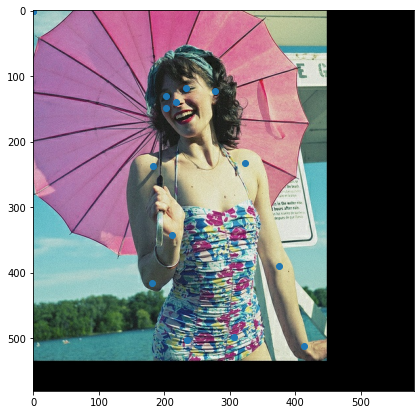

keypoints/vis: [2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2 0]
keypoints/x: [60.415 62.415 59.415 68.415  0.    68.415 56.415 66.415 40.415 48.415
 39.415 48.415  0.    36.415  0.    26.415  0.   ]
keypoints/y: [24.7 23.7 22.7 25.7  0.  33.7 32.7 42.7 39.7 29.7 30.7 56.7  0.  50.7
  0.  70.7  0. ]
ann_id: 198565
bbox_x: 190.5850067138672
bbox_y: 251.3000030517578
coco_url: b'http://images.cocodataset.org/train2017/000000000049.jpg'
height: 91
image_id: 49
image_path: b'dataset/images/train2017/000000000049.jpg'
keypoints/num: 13
offset_height: 0.0
offset_width: 0.0
width: 91
Image shape: (91, 91, 3)


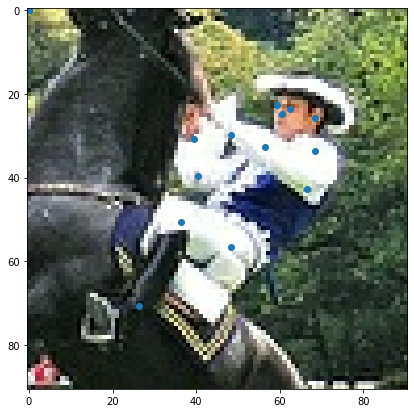

keypoints/vis: [1 2 1 2 0 2 2 2 0 0 0 2 2 2 0 2 0]
keypoints/x: [50.44625 52.44625 49.44625 59.44625  0.      58.44625 51.44625 43.44625
  0.       0.       0.      50.44625 44.44625 34.44625  0.      24.44625
  0.     ]
keypoints/y: [16.54625 15.54625 15.54625 16.54625  0.      25.54625 23.54625 33.54625
  0.       0.       0.      50.54625 48.54625 42.54625  0.      65.54625
  0.     ]
ann_id: 254537
bbox_x: 107.55374908447266
bbox_y: 253.45375061035156
coco_url: b'http://images.cocodataset.org/train2017/000000000049.jpg'
height: 78
image_id: 49
image_path: b'dataset/images/train2017/000000000049.jpg'
keypoints/num: 11
offset_height: 0.0
offset_width: 0.0
width: 78
Image shape: (78, 78, 3)


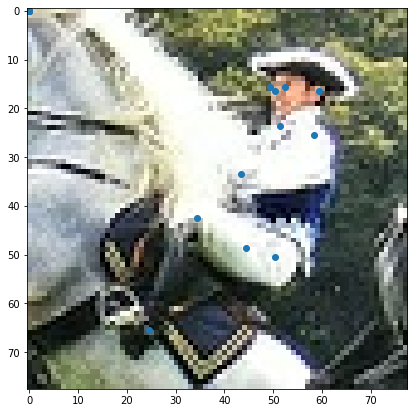

keypoints/vis: [0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
keypoints/x: [  0.        0.        0.       63.56625  73.56625  47.56625  69.56625
  37.56625  90.56625  29.56625 111.56625  37.56625  55.56625  37.56625
  74.56625  36.56625  60.56625]
keypoints/y: [  0.        0.        0.       31.55625  38.55625  42.55625  44.55625
  28.55625  37.55625  20.55625  27.55625  84.55625  86.55625  96.55625
  67.55625 128.55624  99.55625]
ann_id: 471474
bbox_x: 193.43374633789062
bbox_y: 41.443748474121094
coco_url: b'http://images.cocodataset.org/train2017/000000000077.jpg'
height: 148
image_id: 77
image_path: b'dataset/images/train2017/000000000077.jpg'
keypoints/num: 14
offset_height: 0.0
offset_width: 0.0
width: 148
Image shape: (148, 148, 3)


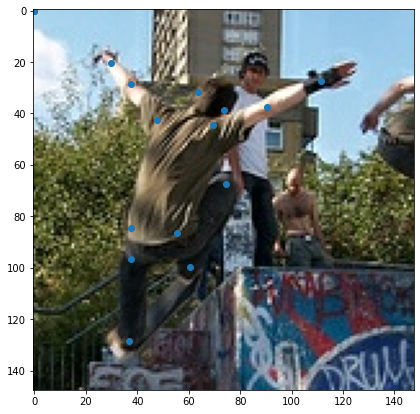

keypoints/vis: [0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2]
keypoints/x: [ 0.     0.    73.755  0.    69.755 47.755 57.755 29.755 82.755 18.755
 95.755 22.755 32.755 46.755 60.755 53.755 49.755]
keypoints/y: [ 0.    0.   27.43  0.   25.43 24.43 25.43 29.43 34.43 40.43 35.43 50.43
 52.43 72.43 68.43 95.43 98.43]
ann_id: 502475
bbox_x: 307.2449951171875
bbox_y: 41.56999969482422
coco_url: b'http://images.cocodataset.org/train2017/000000000077.jpg'
height: 121
image_id: 77
image_path: b'dataset/images/train2017/000000000077.jpg'
keypoints/num: 14
offset_height: 0.0
offset_width: 0.0
width: 121
Image shape: (121, 121, 3)


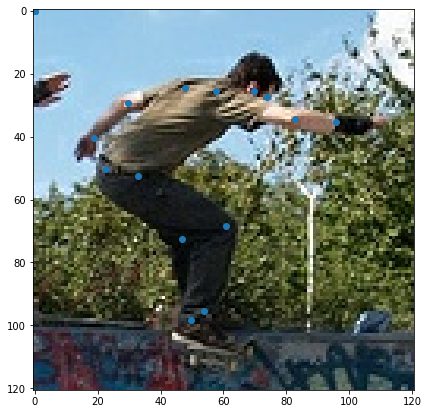

In [13]:
gen_examples_from_tfrecord('dataset/tfrecords/train/file_train_00-2048.tfrec', 5)



---



---

IF run on local machine skip the following

In [9]:
!zip -r 'dataset/tfrecords.zip' 'dataset/tfrecords'

  adding: dataset/tfrecords/ (stored 0%)
  adding: dataset/tfrecords/valid/ (stored 0%)
  adding: dataset/tfrecords/valid/file_valid_02-1551.tfrec (deflated 3%)
  adding: dataset/tfrecords/valid/file_valid_01-2048.tfrec (deflated 3%)
  adding: dataset/tfrecords/valid/file_valid_00-2048.tfrec (deflated 3%)
  adding: dataset/tfrecords/train/ (stored 0%)
  adding: dataset/tfrecords/train/file_train_21-2048.tfrec (deflated 3%)
  adding: dataset/tfrecords/train/file_train_00-2048.tfrec (deflated 3%)
  adding: dataset/tfrecords/train/file_train_47-2048.tfrec (deflated 2%)
  adding: dataset/tfrecords/train/file_train_50-2048.tfrec (deflated 3%)
  adding: dataset/tfrecords/train/file_train_25-2048.tfrec (deflated 2%)
  adding: dataset/tfrecords/train/file_train_20-2048.tfrec (deflated 2%)
  adding: dataset/tfrecords/train/file_train_62-2048.tfrec (deflated 3%)
  adding: dataset/tfrecords/train/file_train_52-2048.tfrec (deflated 2%)
  adding: dataset/tfrecords/train/file_train_36-2048.tfrec (de

In [10]:
!cp 'dataset/tfrecords.zip' 'drive/MyDrive/single-person-pose-estimation/dataset'